In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from textblob import TextBlob


In [2]:
#Importing Dataset
df = pd.read_csv("blogs.csv")

In [3]:
#Data Preprocessing
print("Data Info : ",df.info())
print("Data Shape : ",df.shape)
print("Data Description : ",df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Data Info :  None
Data Shape :  (2000, 2)
Data Description :                                                       Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


In [4]:
#Train-Test Split
X = df["Data"]
y = df["Labels"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
#Data Cleaning
def clean_text(text) :
    text = text.lower()
    text = re.sub(r"[^a-z\s]","",text)
    return text

df["Data"] = df["Data"].apply(clean_text)


In [6]:
#Vectorization
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
#Creating Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)
y_pred = nb.predict(X_test_tfidf)

print("\nMultinomialNB Accuracy : ",accuracy_score(y_test,y_pred))
print("\nMultinomialNB Precision : ",precision_score(y_test,y_pred,average="weighted"))
print("\nMultinomialNB Recall : ",recall_score(y_test,y_pred,average="weighted"))
print("\nMultinomialNB F1 : ",f1_score(y_test,y_pred,average="weighted"))

scores = cross_val_score(nb,X_train_tfidf,y_train,cv=3)
print("\nCross Validation Score : ",scores.mean())




MultinomialNB Accuracy :  0.785

MultinomialNB Precision :  0.8091889583134454

MultinomialNB Recall :  0.785

MultinomialNB F1 :  0.7716850685269284

Cross Validation Score :  0.8100041458495829


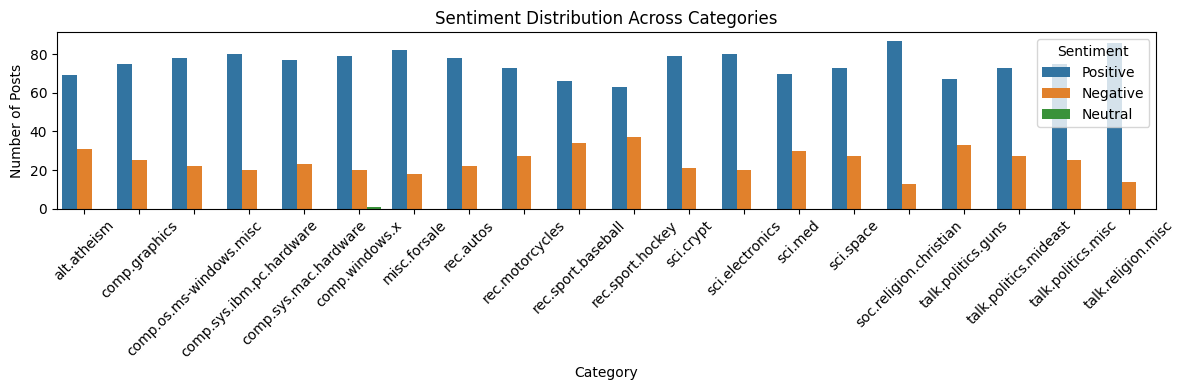

In [8]:
#Creating Sentiment Analyzer
def get_sentiment(text) :
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Data"].apply(get_sentiment)

plt.figure(figsize=(12,4))
sns.countplot(data=df,x="Labels",hue="Sentiment")
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.1 MB/s  0:00:00
